# Lab: Simple Linear Regression

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline

In [3]:
url= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv"
df = pd.read_csv(url)

In [4]:
df.sample(5)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
306,2014,DODGE,CHARGER AWD (MDS),FULL-SIZE,5.7,8,A5,X,16.1,10.0,13.4,21,308
64,2014,AUDI,TT COUPE QUATTRO,SUBCOMPACT,2.0,4,A6,Z,10.4,7.6,9.1,31,209
790,2014,MINI,COOPER ROADSTER,TWO-SEATER,1.6,4,A6,Z,8.7,6.6,7.8,36,179
824,2014,MITSUBISHI,MIRAGE,COMPACT,1.2,3,AV,X,6.4,5.4,6.0,47,138
785,2014,MINI,COOPER COUNTRYMAN,COMPACT,1.6,4,M6,Z,8.6,6.8,7.8,36,179


In [5]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [6]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.sample(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
618,2.0,4,9.2,212
810,1.6,4,8.3,191
200,1.8,4,8.2,189
375,3.7,6,12.3,283
830,2.0,4,8.8,202
27,3.0,6,8.3,224
296,3.6,6,14.4,230
897,2.7,6,9.2,212
190,3.6,6,10.5,242


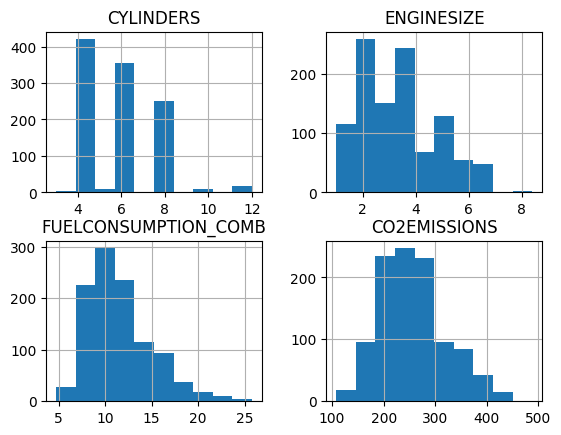

In [8]:
viz = cdf[['CYLINDERS','ENGINESIZE','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
viz.hist()
plt.show()


In [9]:
viz

,CYLINDERS,ENGINESIZE,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,4,2.0,8.5,196
1,4,2.4,9.6,221
2,4,1.5,5.9,136
3,6,3.5,11.1,255
4,6,3.5,10.6,244
...,...,...,...,...
1062,6,3.0,11.8,271
1063,6,3.2,11.5,264
1064,6,3.0,11.8,271
1065,6,3.2,11.3,260


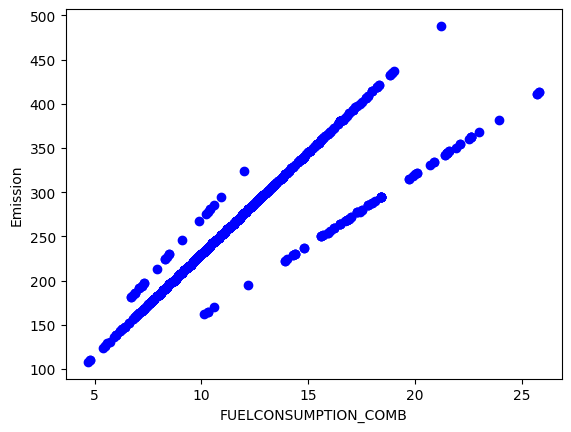

In [11]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()

Text(0, 0.5, 'Emission')

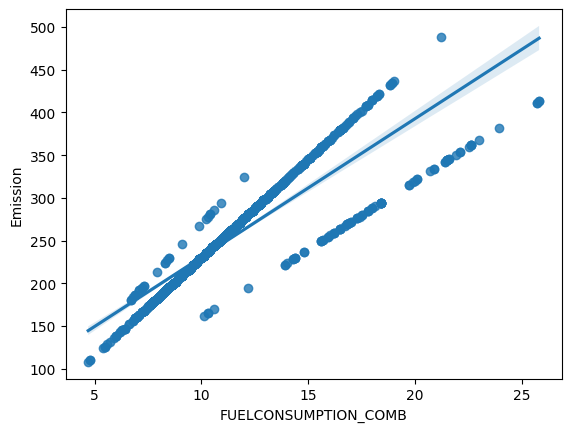

In [15]:
import seaborn as sns

sns.regplot(x=cdf.FUELCONSUMPTION_COMB, y=cdf.CO2EMISSIONS )
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")

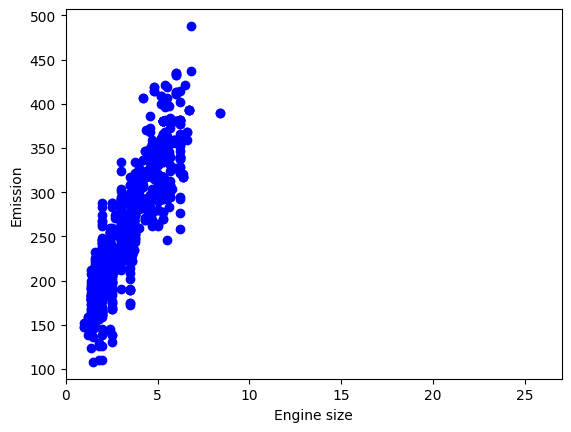

In [16]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.xlim(0,27)
plt.show()

(0.27, 507.0)

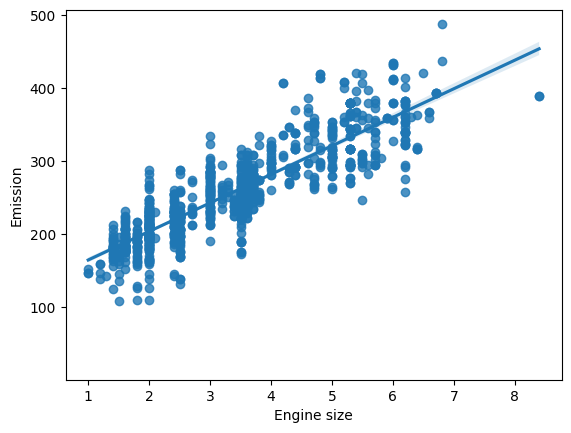

In [18]:
sns.regplot(x=cdf.ENGINESIZE, y=cdf.CO2EMISSIONS )
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.ylim(0.27)

In [19]:
cdf[["FUELCONSUMPTION_COMB", "CO2EMISSIONS"]].corr()

,FUELCONSUMPTION_COMB,CO2EMISSIONS
FUELCONSUMPTION_COMB,1.000000,0.892129
CO2EMISSIONS,0.892129,1.000000


In [20]:
cdf.corr()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
ENGINESIZE,1.000000,0.934011,0.819482,0.874154
CYLINDERS,0.934011,1.000000,0.776788,0.849685
FUELCONSUMPTION_COMB,0.819482,0.776788,1.000000,0.892129
CO2EMISSIONS,0.874154,0.849685,0.892129,1.000000


In [21]:
X = cdf.ENGINESIZE.to_numpy()
y = cdf.CO2EMISSIONS.to_numpy()

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Building the model

In [27]:
from sklearn import linear_model

regressor = linear_model.LinearRegression()

regressor.fit(X_train.reshape(-1, 1), y_train)

print ('Coefficients: ', regressor.coef_[0]) # with simple linear regression there is only one coefficient, here we extract it from the 1 by 1 array.
print ('Intercept: ',regressor.intercept_)


Coefficients:  38.992978724434074
Intercept:  126.28970217408721


Text(0, 0.5, 'Emission')

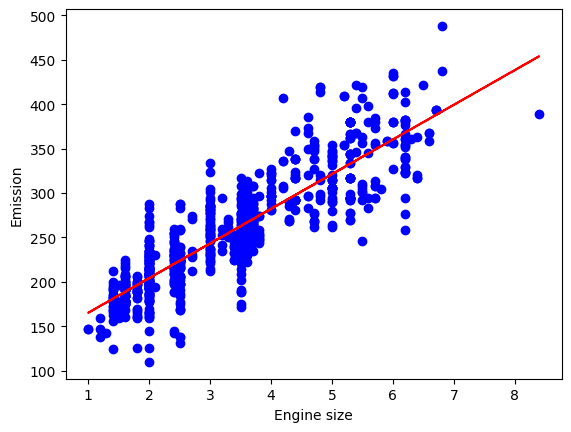

In [28]:
plt.scatter(X_train, y_train,  color='blue')
plt.plot(X_train, regressor.coef_ * X_train + regressor.intercept_, '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

In [29]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Use the predict method to make test predictions
y_test_ = regressor.predict(X_test.reshape(-1,1))

# Evaluation
print("Mean absolute error: %.2f" % mean_absolute_error(y_test, y_test_))
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_test_))
print("Root mean squared error: %.2f" % np.sqrt(mean_squared_error(y_test, y_test_)))
print("R2-score: %.2f" % r2_score(y_test, y_test_))

Mean absolute error: 24.10
Mean squared error: 985.94
Root mean squared error: 31.40
R2-score: 0.76


# Practice exercises

Text(0, 0.5, 'Emission')

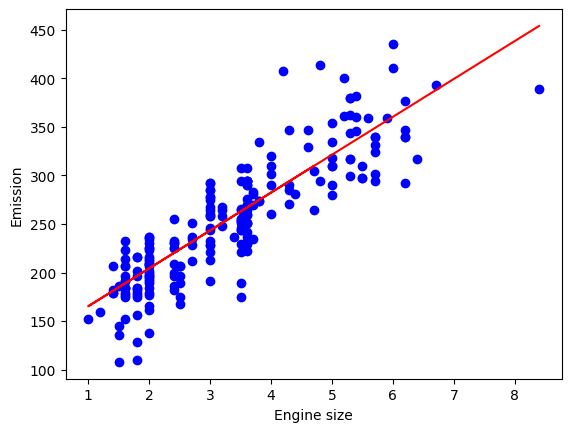

In [32]:
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_test_, '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

In [33]:
X = cdf.FUELCONSUMPTION_COMB.to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)


In [34]:
regr = linear_model.LinearRegression()
regr.fit(X_train.reshape(-1, 1), y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [35]:
y = regr.predict(X_test.reshape(-1,1))

In [36]:
mea = mean_absolute_error(y_test, y)
mse = mean_squared_error(y_test, y)
r2 = r2_score(y_test, y)

print("Mean absolute error: %.2f" % mea)
print("Mean squared error: %.2f" % mse)
print("R2-score: %.2f" % r2)



Mean absolute error: 20.44
Mean squared error: 797.43
R2-score: 0.81
